In [3]:
import numpy as np
import copy
from IPython.display import HTML
from matplotlib import pyplot as plt, colors
import dill

import SimPEG as simpeg
from SimPEG.EM import NSEM

import sys
sys.path.append("../../../../pymatsolver/")
from pymatsolver import PardisoSolver
sys.path.append("../../../../../Dropbox/PhD_UBC/telluricpy/")
import telluricpy


# Set some matplotlib settings
%matplotlib inline

In [91]:
mtData = dill.load(open('sphere_mtData_1e2_1e1.pklb','rb'))

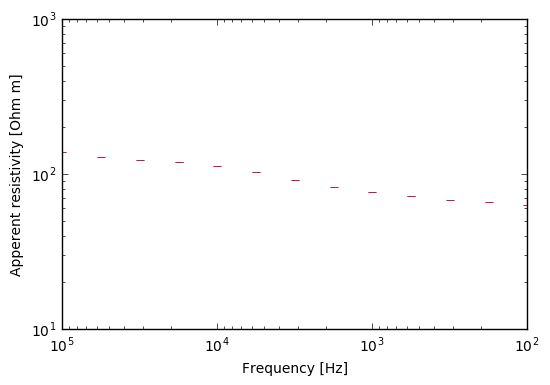

In [92]:
mtData.plot_app_res(np.array([0.,0.]))

In [93]:
cont_kwargs

{'levels': array([  600.,   650.,   700.,   750.,   800.,   850.,   900.,   950.,
         1000.,  1050.,  1100.,  1150.,  1200.,  1250.,  1300.,  1350.,
         1400.])}

In [94]:
mtData.map_iso_frequency??

In [95]:
np.linspace(600,1400,17)

array([  600.,   650.,   700.,   750.,   800.,   850.,   900.,   950.,
        1000.,  1050.,  1100.,  1150.,  1200.,  1250.,  1300.,  1350.,
        1400.])

In [96]:
plt.colorbar??

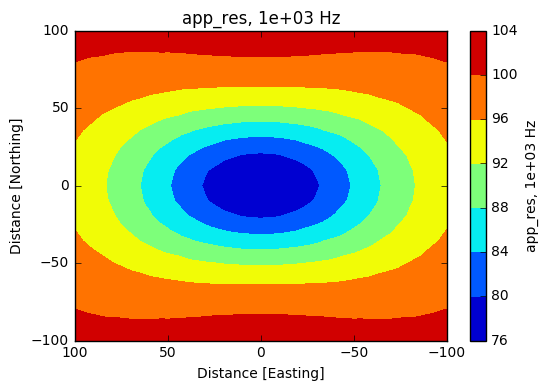

In [99]:
cont_kwargs={'levels':np.linspace(600,1400,17)}#,'norm':colors.LogNorm()}
component = 'app_res'
freq = 1e3
mtData.map_iso_frequency(freq, 'Z', 'yx', component=component,ax=None, plot_error=False)#, **cont_kwargs)
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))


In [80]:
[component,', ',freq, 'Hz'

['app_res', ', ', 100000.0, 'Hz']

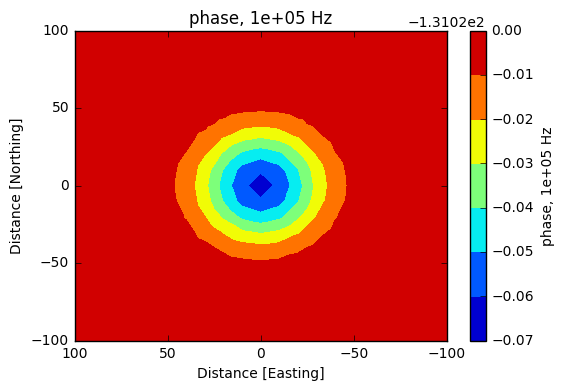

In [100]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'Z', 'xy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

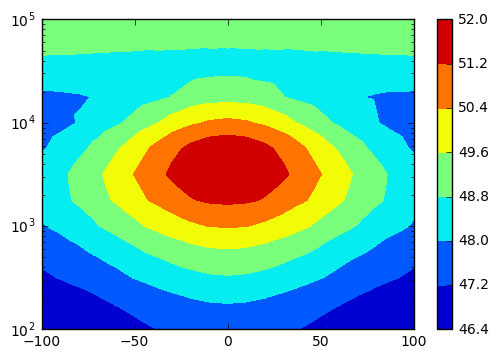

In [182]:
#cont_args = {'levels':np.logspace(1.5,2.2,8*4+1)}#,'norm':colors.LogNorm()}
cont_args = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
fig, ax, cont = mtData.section_plot({'y':0.},'Z','yx','phase',ax=None, plot_error=False)#, **cont_args)
ax.set_yscale('log')
plt.colorbar(cont)

In [112]:
cont_args = {'levels':np.linspace(100.,1000.,10),'norm':colors.LogNorm()}


In [113]:
cont_args

{'levels': array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
          900.,  1000.]), 'norm': <matplotlib.colors.LogNorm at 0x1c3d97b8>}

In [136]:
mtData.section_plot({'y':0.},'Z','xy','app_res',ax=ax0, plot_error=False)#, **cont_args)

(<matplotlib.figure.Figure at 0x36fc64e0>,
 <matplotlib.tri.tricontour.TriContourSet at 0x397ad048>)

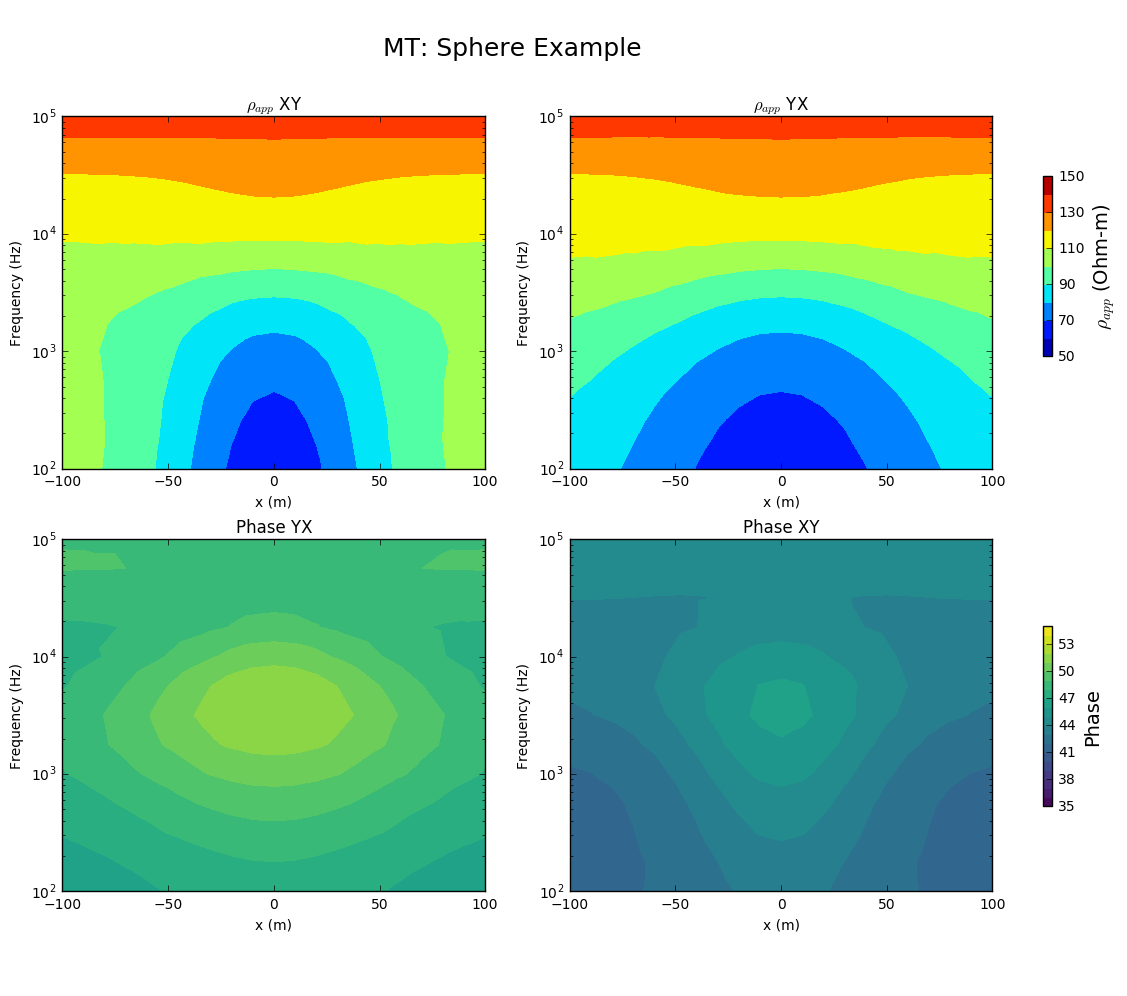

In [247]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'Z','xy','app_res',ax=ax0, plot_error=False, **cont_args_app_res)
fig,ax1,cont_phasexy = mtData.section_plot({'y':0.},'Z','xy','phase',ax=ax1, plot_error=False, **cont_args_phasexy)
fig,ax2,cont_appresyx = mtData.section_plot({'y':0.},'Z','yx','app_res',ax=ax2, plot_error=False, **cont_args_app_res)
fig,ax3,cont_phaseyx = mtData.section_plot({'y':0.},'Z','yx','phase',ax=ax3, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'$\rho_{app}$ XY')
ax2.set_title(r'$\rho_{app}$ YX')
ax1.set_title(r'Phase XY')
ax3.set_title(r'Phase YX')

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax)#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Sphere Example',fontsize =18.)

#plt.tight_layout()

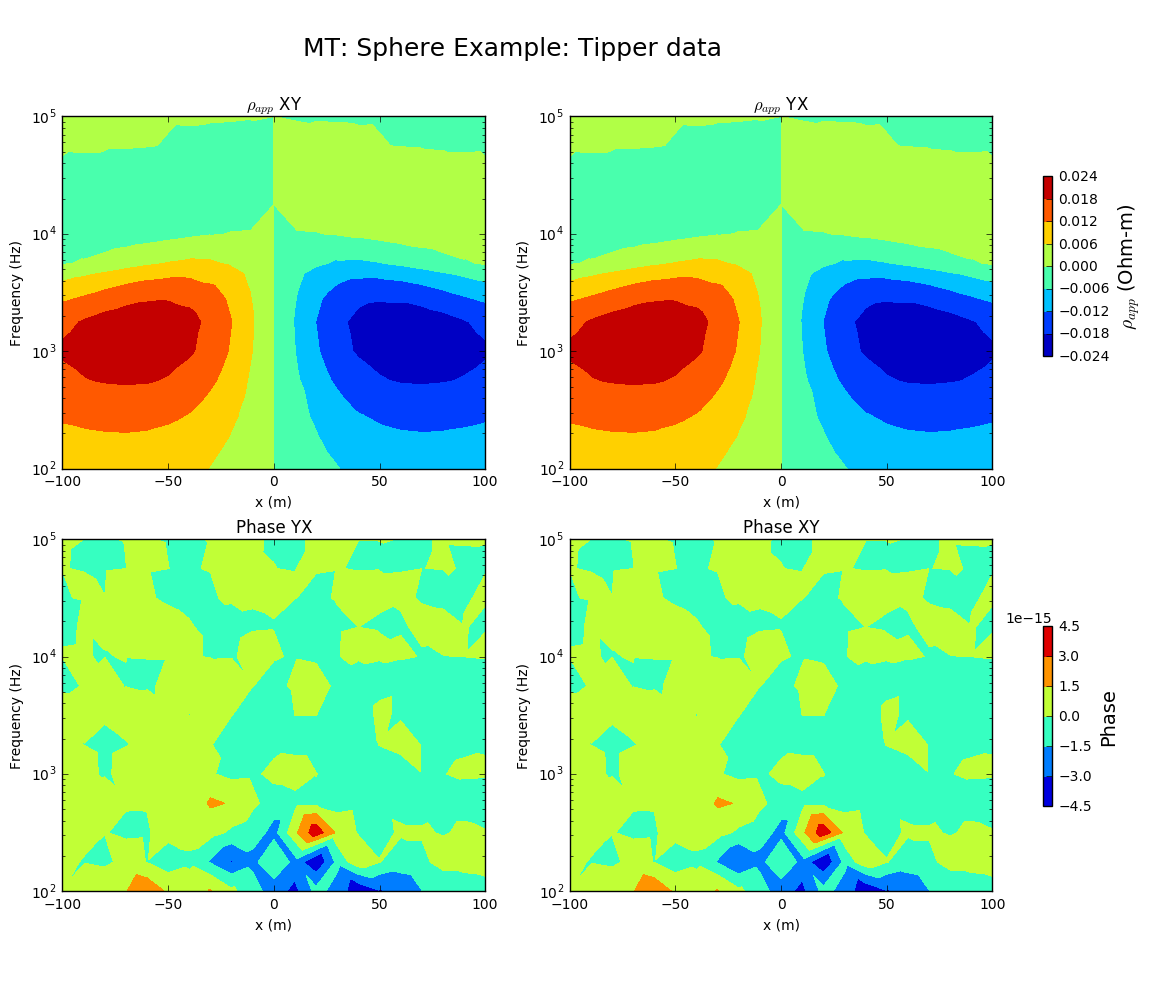

In [226]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'T','zx','real',ax=ax0, plot_error=False)#, **cont_args_app_res)
fig,ax1,cont_phasexy = mtData.section_plot({'y':0.},'T','zy','imag',ax=ax1, plot_error=False)#, **cont_args_phasexy)
fig,ax2,cont_appresyx = mtData.section_plot({'y':0.},'T','zx','real',ax=ax2, plot_error=False)#, **cont_args_app_res)
fig,ax3,cont_phaseyx = mtData.section_plot({'y':0.},'T','zy','imag',ax=ax3, plot_error=False)#, **cont_args_phaseyx)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'$\rho_{app}$ XY')
ax2.set_title(r'$\rho_{app}$ YX')
ax1.set_title(r'Phase XY')
ax3.set_title(r'Phase YX')

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax)#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Sphere Example: Tipper data',fontsize =18.)

#plt.tight_layout()

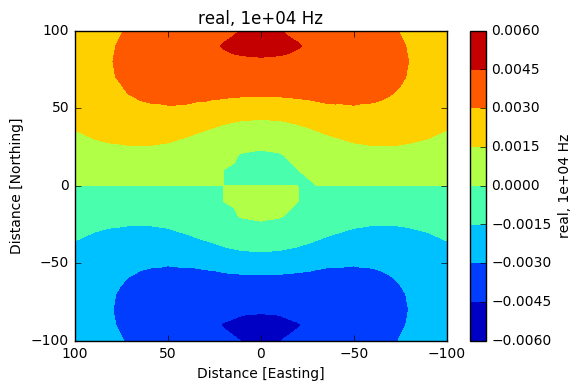

In [235]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

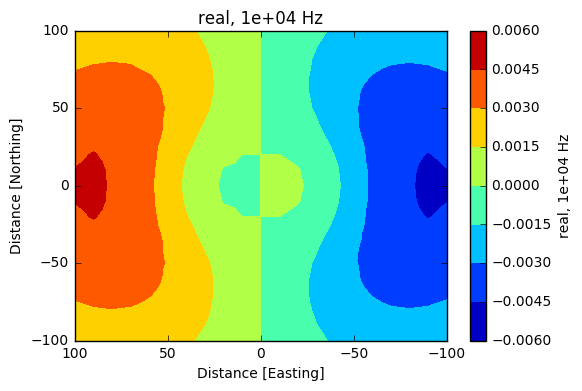

In [236]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

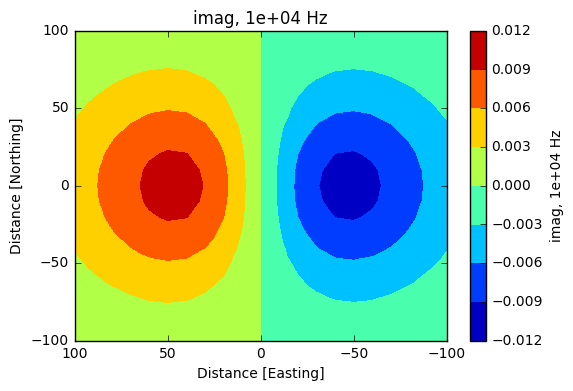

In [238]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

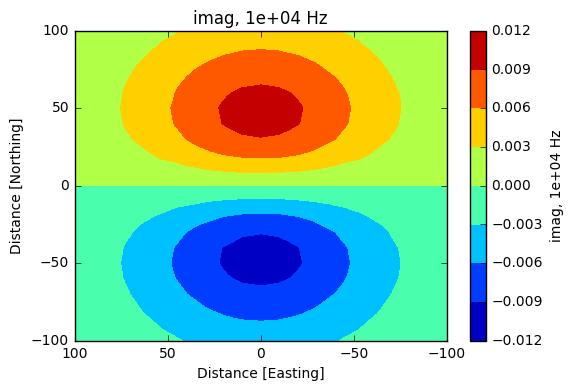

In [239]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

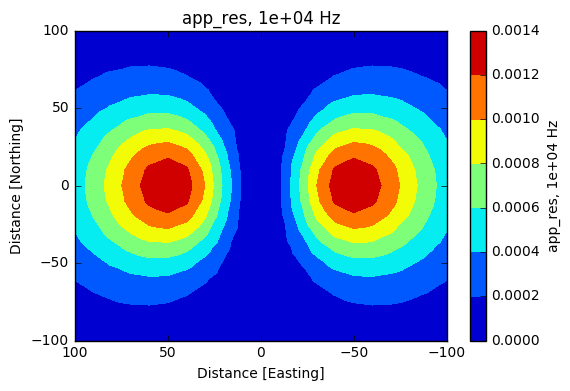

In [240]:
component = 'app_res'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

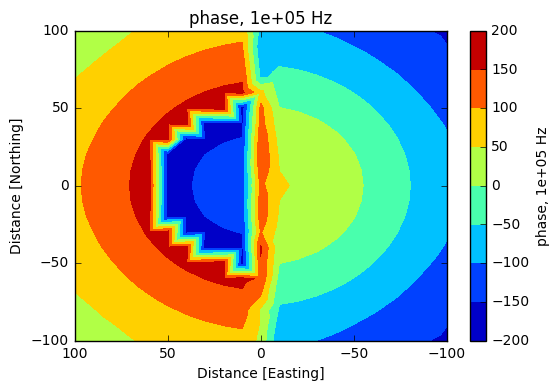

In [245]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

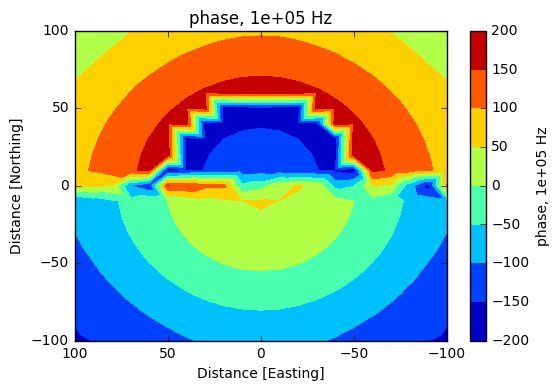

In [246]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))